## Importing all packages needed to run this notebook and checking the pandas and networkx versions

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.2.4
2.5


## Implementing the dike model

In [3]:
from ema_workbench import (Model, Policy, ema_logging, SequentialEvaluator, 
                           MultiprocessingEvaluator)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation

def sum_over(*args):
    return sum(args)

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, in oure case number 5 because it contains all the outcomes Deventer finds interesting
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

In [5]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
CategoricalParameter('A.1_Brate', [0, 1, 2])
CategoricalParameter('A.2_Brate', [0, 1, 2])
CategoricalParameter('A.3_Brate', [0, 1, 2])
CategoricalParameter('A.4_Brate', [0, 1, 2])
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [6]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = copy.deepcopy(dike_model.levers)

In [7]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1_Expected Annual Damage 0')
ScalarOutcome('A.1_Dike Investment Costs 0')
ScalarOutcome('A.1_Expected Number of Deaths 0')
ScalarOutcome('A.2_Expected Annual Damage 0')
ScalarOutcome('A.2_Dike Investment Costs 0')
ScalarOutcome('A.2_Expected Number of Deaths 0')
ScalarOutcome('A.3_Expected Annual Damage 0')
ScalarOutcome('A.3_Dike Investment Costs 0')
ScalarOutcome('A.3_Expected Number of Deaths 0')
ScalarOutcome('A.4_Expected Annual Damage 0')
ScalarOutcome('A.4_Dike Investment Costs 0')
ScalarOutcome('A.4_Expected Number of Deaths 0')
ScalarOutcome('A.5_Expected Annual Damage 0')
ScalarOutcome('A.5_Dike Investment Costs 0')
ScalarOutcome('A.5_Expected Number of Deaths 0')
ScalarOutcome('RfR Total Costs 0')
ScalarOutcome('Expected Evacuation Costs 0')
ScalarOutcome('A.1_Expected Annual Damage 1')
ScalarOutcome('A.1_Dike Investment Costs 1')
ScalarOutcome('A.1_Expected Number of Deaths 1')
ScalarOutcome('A.2_Expected Annual Damage 1')
ScalarOutcome('A.2_Dike Investment

## Running the model with problem formulation 5

In this part of the notebook the model is run to obtain the results needed to visualize and study the results. Because running takes quite some time, it is suggested to skip this part of the Notebook and continue with the following section of this notebook "Cleaning the data". If you want to run the model again, the hash tags have to be removed from all of the cells. 

In [ ]:
#running the model through EMA workbench 
#running 750 random scenarios and 40 random policies for problem formulation 5
#with MultiprocessingEvaluator(dike_model) as evaluator:
#    results = evaluator.perform_experiments(scenarios=750, policies=40)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 750 scenarios * 40 policies * 1 model(s) = 30000 experiments
  0%|                                    | 24/30000 [00:42<11:39:39,  1.40s/it]

In [12]:
#observing the simulation runs
#experiments, outcomes = results
#print(outcomes.keys())
#experiments

dict_keys(['A.1_Expected Annual Damage 0', 'A.1_Dike Investment Costs 0', 'A.1_Expected Number of Deaths 0', 'A.2_Expected Annual Damage 0', 'A.2_Dike Investment Costs 0', 'A.2_Expected Number of Deaths 0', 'A.3_Expected Annual Damage 0', 'A.3_Dike Investment Costs 0', 'A.3_Expected Number of Deaths 0', 'A.4_Expected Annual Damage 0', 'A.4_Dike Investment Costs 0', 'A.4_Expected Number of Deaths 0', 'A.5_Expected Annual Damage 0', 'A.5_Dike Investment Costs 0', 'A.5_Expected Number of Deaths 0', 'RfR Total Costs 0', 'Expected Evacuation Costs 0', 'A.1_Expected Annual Damage 1', 'A.1_Dike Investment Costs 1', 'A.1_Expected Number of Deaths 1', 'A.2_Expected Annual Damage 1', 'A.2_Dike Investment Costs 1', 'A.2_Expected Number of Deaths 1', 'A.3_Expected Annual Damage 1', 'A.3_Dike Investment Costs 1', 'A.3_Expected Number of Deaths 1', 'A.4_Expected Annual Damage 1', 'A.4_Dike Investment Costs 1', 'A.4_Expected Number of Deaths 1', 'A.5_Expected Annual Damage 1', 'A.5_Dike Investment Co

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,125,94.423307,1.5,0.105320,232.179311,10,0.941302,101.331883,1.5,0.210472,...,7,4,7,9,3,10,0,4,0,dikesnet
1,58,171.726840,1.0,0.918266,35.036125,10,0.379168,80.509628,10,0.141742,...,7,4,7,9,3,10,0,5,0,dikesnet
2,38,242.147755,1.0,0.446095,150.758608,1.0,0.057107,33.671408,1.0,0.816409,...,7,4,7,9,3,10,0,6,0,dikesnet
3,99,342.661042,10,0.792370,101.862653,1.5,0.856845,282.828181,10,0.518831,...,7,4,7,9,3,10,0,7,0,dikesnet
4,40,84.111564,1.5,0.073993,311.537716,1.5,0.452753,229.801517,1.5,0.776229,...,7,4,7,9,3,10,0,8,0,dikesnet
5,106,263.888268,1.5,0.576221,215.479949,1.5,0.744148,320.426089,10,0.960100,...,7,4,7,9,3,10,0,9,0,dikesnet
6,5,209.930513,10,0.678190,318.963711,10,0.656827,180.859860,1.5,0.355779,...,7,4,7,9,3,10,0,10,0,dikesnet
7,92,126.475960,1.0,0.252137,83.210496,1.0,0.561859,154.441407,1.0,0.036593,...,7,4,7,9,3,10,0,11,0,dikesnet
8,14,310.049206,10,0.856123,178.515650,1.0,0.182079,292.832785,1.0,0.626924,...,7,4,7,9,3,10,0,12,0,dikesnet
9,72,43.719609,1.0,0.332354,269.104073,10,0.243567,191.972323,1.0,0.411923,...,7,4,7,9,3,10,0,13,0,dikesnet


In [ ]:
# Add a column indicating the policy of the outcomes 
#import numpy as np 
#import pandas as pd

#policies = experiments["policy"]
#for i, policy in enumerate(np.unique(policies)):
    #experiments.loc[policies == policy, "policy"] = str(i)

#data = pd.DataFrame(outcomes)
#data["policy"] = policies

In [ ]:
# Create a dataframe consisting of the experiments
#experiments = pd.DataFrame(experiments)
#experiments

In [ ]:
# Save dataframe consisting of the experiments
#experiments.to_csv('data/Open Exploration/experiments.csv')

In [ ]:
# Save dataframe that includes all outcomes and the policy
#data.to_csv('data/Open Exploration/data.csv')

## Cleaning the data

In [3]:
data = pd.read_csv('results/data.csv')
experiments = pd.read_csv('results/experiments.csv')

In [4]:
data

,Unnamed: 0,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,...,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
0,0,0.000000e+00,-1974912592,NaN,NaN,NaN,NaN,NaN,-20774576,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,0.000000e+00,0,0.000000,0.000000e+00,6.604510e+07,0.000000,3.657640e+06,508,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,2.959916e+07,0,0.002201,0.000000e+00,6.604510e+07,0.000000,0.000000e+00,0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,0.000000e+00,0,0.000000,1.967267e+06,6.604510e+07,0.000354,1.773302e+07,0,0.005779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0.000000e+00,0,0.000000,1.420545e+07,6.604510e+07,0.001608,2.689535e+07,0,0.005682,...,0.0,0.0,1.744711e+07,0.0,0.0,5.525012e+07,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,0.000000e+00,24198032,0.000000,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29996,29996,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,2.133176e+07,24198032,0.005637,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29997,29997,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,3.122943e+08,24198032,0.076036,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29998,29998,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,2.699726e+07,24198032,0.005721,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39


In [5]:
experiments

,Unnamed: 0,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,0,39,277.866667,1.5,0.931863,347.615713,10.0,0.241298,197.105832,1.0,...,4,2,7,6,9,4,3,40,0,dikesnet
1,1,80,256.185260,1.0,0.226763,266.203162,1.0,0.320464,67.688581,1.0,...,4,2,7,6,9,4,3,41,0,dikesnet
2,2,27,132.632009,1.5,0.119762,204.746859,10.0,0.850077,224.582964,1.5,...,4,2,7,6,9,4,3,42,0,dikesnet
3,3,126,216.307139,1.5,0.714448,341.019977,1.0,0.184015,129.887050,10.0,...,4,2,7,6,9,4,3,43,0,dikesnet
4,4,64,199.629547,1.5,0.871696,342.615961,1.0,0.040748,258.387769,10.0,...,4,2,7,6,9,4,3,44,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,15,57.640175,1.5,0.445585,86.347931,1.0,0.386124,314.898016,10.0,...,4,2,2,10,5,4,4,785,39,dikesnet
29996,29996,130,329.803654,1.0,0.896047,226.459840,1.0,0.634773,342.707657,1.0,...,4,2,2,10,5,4,4,786,39,dikesnet
29997,29997,17,40.578361,10.0,0.788768,156.493077,1.5,0.545445,309.382706,1.5,...,4,2,2,10,5,4,4,787,39,dikesnet
29998,29998,82,293.308173,1.5,0.010440,293.780918,10.0,0.914509,212.031512,10.0,...,4,2,2,10,5,4,4,788,39,dikesnet


In [6]:
columns=[]
for i in data: 
    columns.append(i)

In [7]:
# Checking whether the data has a lot of missing values
for i in columns: 
    missing_data_points=data[i].isna().sum()
    print(missing_data_points,'out of',len(data[i]), '(total) datapoints are missing in', i,)

0 out of 30000 (total) datapoints are missing in Unnamed: 0
0 out of 30000 (total) datapoints are missing in A.1_Expected Annual Damage 0
0 out of 30000 (total) datapoints are missing in A.1_Dike Investment Costs 0
1 out of 30000 (total) datapoints are missing in A.1_Expected Number of Deaths 0
1 out of 30000 (total) datapoints are missing in A.2_Expected Annual Damage 0
1 out of 30000 (total) datapoints are missing in A.2_Dike Investment Costs 0
1 out of 30000 (total) datapoints are missing in A.2_Expected Number of Deaths 0
1 out of 30000 (total) datapoints are missing in A.3_Expected Annual Damage 0
0 out of 30000 (total) datapoints are missing in A.3_Dike Investment Costs 0
2 out of 30000 (total) datapoints are missing in A.3_Expected Number of Deaths 0
2 out of 30000 (total) datapoints are missing in A.4_Expected Annual Damage 0
2 out of 30000 (total) datapoints are missing in A.4_Dike Investment Costs 0
2 out of 30000 (total) datapoints are missing in A.4_Expected Number of Death

In [8]:
# Deleting al missing values considering there are very few 
data = data.dropna()
data

,Unnamed: 0,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,...,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
4,4,0.000000e+00,0,0.000000,1.420545e+07,6.604510e+07,0.001608,2.689535e+07,0,0.005682,...,0.0,0.0,1.744711e+07,0.0,0.0,5.525012e+07,0.0,461900000.0,0.0,0
5,5,6.012587e+06,0,0.000447,0.000000e+00,6.604510e+07,0.000000,2.687981e+07,0,0.005676,...,0.0,0.0,1.744711e+07,0.0,0.0,5.525012e+07,0.0,461900000.0,0.0,0
6,6,0.000000e+00,0,0.000000,0.000000e+00,6.604510e+07,0.000000,3.589354e+08,0,0.054616,...,0.0,0.0,1.744711e+07,0.0,0.0,5.525012e+07,0.0,461900000.0,0.0,0
7,7,0.000000e+00,0,0.000000,1.962471e+06,6.604510e+07,0.000353,1.767287e+07,0,0.005744,...,0.0,0.0,1.744711e+07,0.0,0.0,5.525012e+07,0.0,461900000.0,0.0,0
8,8,6.012587e+06,0,0.000447,0.000000e+00,6.604510e+07,0.000000,1.222118e+07,0,0.002601,...,0.0,0.0,1.744711e+07,0.0,0.0,5.525012e+07,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,0.000000e+00,24198032,0.000000,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29996,29996,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,2.133176e+07,24198032,0.005637,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29997,29997,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,3.122943e+08,24198032,0.076036,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29998,29998,0.000000e+00,76299088,0.000000,0.000000e+00,9.952540e+07,0.000000,2.699726e+07,24198032,0.005721,...,0.0,0.0,8.969763e+06,0.0,0.0,5.525012e+07,0.0,84600000.0,0.0,39


In [9]:
# Checking whether the data has any values below zero because that should not be the case
(data < 0).values.any()

False

In [10]:
columns=[]
for i in experiments: 
    columns.append(i)

In [11]:
# Checking whether the experiments have any missing values, in this case no. 
for i in columns: 
    missing_data_points=experiments[i].isna().sum()
    print(missing_data_points,'out of',len(experiments[i]), '(total) datapoints are missing in', i,)

0 out of 30000 (total) datapoints are missing in Unnamed: 0
0 out of 30000 (total) datapoints are missing in A.0_ID flood wave shape
0 out of 30000 (total) datapoints are missing in A.1_Bmax
0 out of 30000 (total) datapoints are missing in A.1_Brate
0 out of 30000 (total) datapoints are missing in A.1_pfail
0 out of 30000 (total) datapoints are missing in A.2_Bmax
0 out of 30000 (total) datapoints are missing in A.2_Brate
0 out of 30000 (total) datapoints are missing in A.2_pfail
0 out of 30000 (total) datapoints are missing in A.3_Bmax
0 out of 30000 (total) datapoints are missing in A.3_Brate
0 out of 30000 (total) datapoints are missing in A.3_pfail
0 out of 30000 (total) datapoints are missing in A.4_Bmax
0 out of 30000 (total) datapoints are missing in A.4_Brate
0 out of 30000 (total) datapoints are missing in A.4_pfail
0 out of 30000 (total) datapoints are missing in A.5_Bmax
0 out of 30000 (total) datapoints are missing in A.5_Brate
0 out of 30000 (total) datapoints are missing 

In [12]:
# Checking whether the experiments include any values below zero, because this should not be the case
(experiments.iloc[:, :53] < 0).values.any()

False

## Preparing the dataframes needed for visualizing the results

In [13]:
# Create a list of columns from the experiments dataframe that are relevant for Deventer
A5policies = ['A.0_ID flood wave shape', 'A.5_Bmax','A.5_Brate','A.5_pfail',
              '4_RfR 0','4_RfR 1','4_RfR 2','A.5_DikeIncrease 0','A.5_DikeIncrease 1','A.5_DikeIncrease 2',
              'EWS_DaysToThreat','scenario','policy','model']

In [14]:
# Make a subset of the experiments dataframe that only consists of the columns that are relevant for Deventer
experiments_deventer = experiments[experiments.columns[experiments.columns.isin(A5policies)]]
experiments_deventer

,A.0_ID flood wave shape,A.5_Bmax,A.5_Brate,A.5_pfail,4_RfR 0,4_RfR 1,4_RfR 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,39,186.842798,1.5,0.950648,0,1,1,6,9,4,3,40,0,dikesnet
1,80,49.186796,1.0,0.209969,0,1,1,6,9,4,3,41,0,dikesnet
2,27,191.288662,1.5,0.736685,0,1,1,6,9,4,3,42,0,dikesnet
3,126,212.088166,1.5,0.724488,0,1,1,6,9,4,3,43,0,dikesnet
4,64,219.792636,1.0,0.751943,0,1,1,6,9,4,3,44,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,15,150.103279,1.5,0.599729,0,0,0,10,5,4,4,785,39,dikesnet
29996,130,143.485256,1.5,0.372067,0,0,0,10,5,4,4,786,39,dikesnet
29997,17,164.732464,1.0,0.371620,0,0,0,10,5,4,4,787,39,dikesnet
29998,82,146.961790,1.5,0.750340,0,0,0,10,5,4,4,788,39,dikesnet


In [15]:
# Create a list of the columns that are relevant for Deventer
interestedA5 = ['A.5_Expected Annual Damage 0','A.5_Dike Investment Costs 0','A.5_Expected Number of Deaths 0',
                'A.5_Expected Annual Damage 1','A.5_Dike Investment Costs 1','A.5_Expected Number of Deaths 1',
                'A.5_Expected Annual Damage 2','A.5_Dike Investment Costs 2','A.5_Expected Number of Deaths 2',
                'RfR Total Costs 0','RfR Total Costs 1','RfR Total Costs 2',
                'Expected Evacuation Costs 0','Expected Evacuation Costs 1','Expected Evacuation Costs 2', 
                'policy','discount rate 0','discount rate 1','discount rate 2',]

In [16]:
# Create a list of the columns that are relevant for Gorssel
interestedA4 = ['A.4_Expected Annual Damage 0','A.4_Dike Investment Costs 0','A.4_Expected Number of Deaths 0',
                'A.4_Expected Annual Damage 1','A.4_Dike Investment Costs 1','A.4_Expected Number of Deaths 1',
                'A.4_Expected Annual Damage 2','A.4_Dike Investment Costs 2','A.4_Expected Number of Deaths 2',
                'RfR Total Costs 0','RfR Total Costs 1','RfR Total Costs 2' ,
                'Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2', 'policy']

In [17]:
# Create a list of the columns that are relevant for Zutphen
interestedA3 = ['A.3_Expected Annual Damage 0','A.3_Dike Investment Costs 0','A.3_Expected Number of Deaths 0',
                'A.3_Expected Annual Damage 1','A.3_Dike Investment Costs 1', 'A.3_Expected Number of Deaths 1', 
                'A.3_Expected Annual Damage 2', 'A.3_Dike Investment Costs 2', 'A.3_Expected Number of Deaths 2', 
                'RfR Total Costs 0','RfR Total Costs 1','RfR Total Costs 2',
                'Expected Evacuation Costs 0','Expected Evacuation Costs 1','Expected Evacuation Costs 2', 'policy']

In [18]:
# Create a list of the columns that are relevant for Cortenoever
interestedA2 = ['A.2_Expected Annual Damage 0','A.2_Dike Investment Costs 0', 'A.2_Expected Number of Deaths 0', 
                'A.2_Expected Annual Damage 1', 'A.2_Dike Investment Costs 1', 'A.2_Expected Number of Deaths 1', 
                'A.2_Expected Annual Damage 2', 'A.2_Dike Investment Costs 2', 'A.2_Expected Number of Deaths 2', 
                'RfR Total Costs 0','RfR Total Costs 1', 'RfR Total Costs 2',
                'Expected Evacuation Costs 0','Expected Evacuation Costs 1','Expected Evacuation Costs 2' , 'policy']

In [19]:
# Create a list of the columns that are relevant for Doesburg
interestedA1 = ['A.1_Expected Annual Damage 0','A.1_Dike Investment Costs 0','A.1_Expected Number of Deaths 0',
                'A.1_Expected Annual Damage 1','A.1_Dike Investment Costs 1','A.1_Expected Number of Deaths 1',
                'A.1_Expected Annual Damage 2','A.1_Dike Investment Costs 2','A.1_Expected Number of Deaths 2',
                'RfR Total Costs 0','RfR Total Costs 1','RfR Total Costs 2', 
                'Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2' , 'policy']

In [20]:
# Create a dataframe with the outcomes of interest for Deventer and the policy per scenario
data_deventer = data[data.columns[data.columns.isin(interestedA5)]]
data_deventer

,A.5_Expected Annual Damage 0,A.5_Dike Investment Costs 0,A.5_Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,A.5_Expected Annual Damage 1,A.5_Dike Investment Costs 1,A.5_Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
4,0.0,4.027367e+07,0.0,217800000.0,2132.343560,0.0,6.497747e+07,0.0,256100000.0,52.972240,0.0,5.525012e+07,0.0,461900000.0,0.0,0
5,0.0,4.027367e+07,0.0,217800000.0,1219.147413,0.0,6.497747e+07,0.0,256100000.0,0.000000,0.0,5.525012e+07,0.0,461900000.0,0.0,0
6,0.0,4.027367e+07,0.0,217800000.0,13014.168044,0.0,6.497747e+07,0.0,256100000.0,0.000000,0.0,5.525012e+07,0.0,461900000.0,0.0,0
7,0.0,4.027367e+07,0.0,217800000.0,1308.911831,0.0,6.497747e+07,0.0,256100000.0,0.000000,0.0,5.525012e+07,0.0,461900000.0,0.0,0
8,0.0,4.027367e+07,0.0,217800000.0,586.642576,0.0,6.497747e+07,0.0,256100000.0,0.000000,0.0,5.525012e+07,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,5.817663e+07,0.0,121200000.0,0.000000,0.0,5.132310e+07,0.0,121200000.0,0.000000,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29996,0.0,5.817663e+07,0.0,121200000.0,1342.849351,0.0,5.132310e+07,0.0,121200000.0,0.000000,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29997,0.0,5.817663e+07,0.0,121200000.0,22046.947269,0.0,5.132310e+07,0.0,121200000.0,1344.026028,0.0,5.525012e+07,0.0,84600000.0,0.0,39
29998,0.0,5.817663e+07,0.0,121200000.0,1344.666323,0.0,5.132310e+07,0.0,121200000.0,0.000000,0.0,5.525012e+07,0.0,84600000.0,0.0,39


In [21]:
# Create a dataframe with the outcomes of interest for Gorssel and the policy per scenario
data_gorssel = data[data.columns[data.columns.isin(interestedA4)]]
data_gorssel

,A.4_Expected Annual Damage 0,A.4_Dike Investment Costs 0,A.4_Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,A.4_Expected Annual Damage 1,A.4_Dike Investment Costs 1,A.4_Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
4,3.230456e+06,9.695195e+06,0.000175,217800000.0,2132.343560,537285.986373,8.386802e+06,0.000052,256100000.0,52.972240,0.0,1.744711e+07,0.0,461900000.0,0.0,0
5,0.000000e+00,9.695195e+06,0.000000,217800000.0,1219.147413,0.000000,8.386802e+06,0.000000,256100000.0,0.000000,0.0,1.744711e+07,0.0,461900000.0,0.0,0
6,0.000000e+00,9.695195e+06,0.000000,217800000.0,13014.168044,0.000000,8.386802e+06,0.000000,256100000.0,0.000000,0.0,1.744711e+07,0.0,461900000.0,0.0,0
7,0.000000e+00,9.695195e+06,0.000000,217800000.0,1308.911831,0.000000,8.386802e+06,0.000000,256100000.0,0.000000,0.0,1.744711e+07,0.0,461900000.0,0.0,0
8,0.000000e+00,9.695195e+06,0.000000,217800000.0,586.642576,0.000000,8.386802e+06,0.000000,256100000.0,0.000000,0.0,1.744711e+07,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000e+00,9.695195e+06,0.000000,121200000.0,0.000000,0.000000,8.386802e+06,0.000000,121200000.0,0.000000,0.0,8.969763e+06,0.0,84600000.0,0.0,39
29996,0.000000e+00,9.695195e+06,0.000000,121200000.0,1342.849351,0.000000,8.386802e+06,0.000000,121200000.0,0.000000,0.0,8.969763e+06,0.0,84600000.0,0.0,39
29997,0.000000e+00,9.695195e+06,0.000000,121200000.0,22046.947269,0.000000,8.386802e+06,0.000000,121200000.0,1344.026028,0.0,8.969763e+06,0.0,84600000.0,0.0,39
29998,0.000000e+00,9.695195e+06,0.000000,121200000.0,1344.666323,0.000000,8.386802e+06,0.000000,121200000.0,0.000000,0.0,8.969763e+06,0.0,84600000.0,0.0,39


In [22]:
# Create a dataframe with the outcomes of interest for Zutphen and the policy per scenario
data_zutphen = data[data.columns[data.columns.isin(interestedA3)]]
data_zutphen

,A.3_Expected Annual Damage 0,A.3_Dike Investment Costs 0,A.3_Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,A.3_Expected Annual Damage 1,A.3_Dike Investment Costs 1,A.3_Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,A.3_Expected Annual Damage 2,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
4,2.689535e+07,0,0.005682,217800000.0,2132.343560,0.000000e+00,4.060905e+07,0.000000,256100000.0,52.972240,0.0,0,0.0,461900000.0,0.0,0
5,2.687981e+07,0,0.005676,217800000.0,1219.147413,0.000000e+00,4.060905e+07,0.000000,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
6,3.589354e+08,0,0.054616,217800000.0,13014.168044,0.000000e+00,4.060905e+07,0.000000,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
7,1.767287e+07,0,0.005744,217800000.0,1308.911831,0.000000e+00,4.060905e+07,0.000000,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
8,1.222118e+07,0,0.002601,217800000.0,586.642576,0.000000e+00,4.060905e+07,0.000000,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000e+00,24198032,0.000000,121200000.0,0.000000,0.000000e+00,2.920360e+07,0.000000,121200000.0,0.000000,0.0,55939153,0.0,84600000.0,0.0,39
29996,2.133176e+07,24198032,0.005637,121200000.0,1342.849351,0.000000e+00,2.920360e+07,0.000000,121200000.0,0.000000,0.0,55939153,0.0,84600000.0,0.0,39
29997,3.122943e+08,24198032,0.076036,121200000.0,22046.947269,1.758247e+07,2.920360e+07,0.005691,121200000.0,1344.026028,0.0,55939153,0.0,84600000.0,0.0,39
29998,2.699726e+07,24198032,0.005721,121200000.0,1344.666323,0.000000e+00,2.920360e+07,0.000000,121200000.0,0.000000,0.0,55939153,0.0,84600000.0,0.0,39


In [23]:
# Create a dataframe with the outcomes of interest for Cortenoever and the policy per scenario
data_cortenoever = data[data.columns[data.columns.isin(interestedA2)]]
data_cortenoever

,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,A.2_Expected Annual Damage 1,A.2_Dike Investment Costs 1,A.2_Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,A.2_Expected Annual Damage 2,A.2_Dike Investment Costs 2,A.2_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
4,1.420545e+07,6.604510e+07,0.001608,217800000.0,2132.343560,0.0,8.969108e+07,0.0,256100000.0,52.972240,0.0,0,0.0,461900000.0,0.0,0
5,0.000000e+00,6.604510e+07,0.000000,217800000.0,1219.147413,0.0,8.969108e+07,0.0,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
6,0.000000e+00,6.604510e+07,0.000000,217800000.0,13014.168044,0.0,8.969108e+07,0.0,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
7,1.962471e+06,6.604510e+07,0.000353,217800000.0,1308.911831,0.0,8.969108e+07,0.0,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
8,0.000000e+00,6.604510e+07,0.000000,217800000.0,586.642576,0.0,8.969108e+07,0.0,256100000.0,0.000000,0.0,0,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000e+00,9.952540e+07,0.000000,121200000.0,0.000000,0.0,1.137347e+08,0.0,121200000.0,0.000000,0.0,78395637,0.0,84600000.0,0.0,39
29996,0.000000e+00,9.952540e+07,0.000000,121200000.0,1342.849351,0.0,1.137347e+08,0.0,121200000.0,0.000000,0.0,78395637,0.0,84600000.0,0.0,39
29997,0.000000e+00,9.952540e+07,0.000000,121200000.0,22046.947269,0.0,1.137347e+08,0.0,121200000.0,1344.026028,0.0,78395637,0.0,84600000.0,0.0,39
29998,0.000000e+00,9.952540e+07,0.000000,121200000.0,1344.666323,0.0,1.137347e+08,0.0,121200000.0,0.000000,0.0,78395637,0.0,84600000.0,0.0,39


In [24]:
# Create a dataframe with the outcomes of interest for Doesburg and the policy per scenario
data_doesburg = data[data.columns[data.columns.isin(interestedA1)]]
data_doesburg

,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,A.1_Expected Annual Damage 1,A.1_Dike Investment Costs 1,A.1_Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,A.1_Expected Annual Damage 2,A.1_Dike Investment Costs 2,A.1_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,policy
4,0.000000e+00,0,0.000000,217800000.0,2132.343560,0.0,8.526436e+07,0.0,256100000.0,52.972240,0.0,7.303033e+07,0.0,461900000.0,0.0,0
5,6.012587e+06,0,0.000447,217800000.0,1219.147413,0.0,8.526436e+07,0.0,256100000.0,0.000000,0.0,7.303033e+07,0.0,461900000.0,0.0,0
6,0.000000e+00,0,0.000000,217800000.0,13014.168044,0.0,8.526436e+07,0.0,256100000.0,0.000000,0.0,7.303033e+07,0.0,461900000.0,0.0,0
7,0.000000e+00,0,0.000000,217800000.0,1308.911831,0.0,8.526436e+07,0.0,256100000.0,0.000000,0.0,7.303033e+07,0.0,461900000.0,0.0,0
8,6.012587e+06,0,0.000447,217800000.0,586.642576,0.0,8.526436e+07,0.0,256100000.0,0.000000,0.0,7.303033e+07,0.0,461900000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000e+00,76299088,0.000000,121200000.0,0.000000,0.0,0.000000e+00,0.0,121200000.0,0.000000,0.0,9.982923e+07,0.0,84600000.0,0.0,39
29996,0.000000e+00,76299088,0.000000,121200000.0,1342.849351,0.0,0.000000e+00,0.0,121200000.0,0.000000,0.0,9.982923e+07,0.0,84600000.0,0.0,39
29997,0.000000e+00,76299088,0.000000,121200000.0,22046.947269,0.0,0.000000e+00,0.0,121200000.0,1344.026028,0.0,9.982923e+07,0.0,84600000.0,0.0,39
29998,0.000000e+00,76299088,0.000000,121200000.0,1344.666323,0.0,0.000000e+00,0.0,121200000.0,0.000000,0.0,9.982923e+07,0.0,84600000.0,0.0,39


In [25]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [26]:
# Add columns with the summed outcomes over the 3 phases 
data_deventer['summed_damage'] = data_deventer[['A.5_Expected Annual Damage 0', 'A.5_Expected Annual Damage 1', 'A.5_Expected Annual Damage 2']].astype(float).sum(1)
data_deventer['summed_dike_investment'] = data_deventer[['A.5_Dike Investment Costs 0', 'A.5_Dike Investment Costs 1', 'A.5_Dike Investment Costs 2']].astype(float).sum(1)
data_deventer['summed_deaths'] = data_deventer[['A.5_Expected Number of Deaths 0', 'A.5_Expected Number of Deaths 1', 'A.5_Expected Number of Deaths 2']].astype(float).sum(1)
data_deventer['summed_RfR'] = data_deventer[['RfR Total Costs 0', 'RfR Total Costs 1', 'RfR Total Costs 2']].astype(float).sum(1)
data_deventer['summed_evacuation'] = data_deventer[['Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2']].astype(float).sum(1)

In [27]:
# Add columns with the summed outcomes over the 3 phases 
data_gorssel['summed_damage'] = data_gorssel[['A.4_Expected Annual Damage 0', 'A.4_Expected Annual Damage 1', 'A.4_Expected Annual Damage 2']].astype(float).sum(1)
data_gorssel['summed_dike_investment'] = data_gorssel[['A.4_Dike Investment Costs 0', 'A.4_Dike Investment Costs 1', 'A.4_Dike Investment Costs 2']].astype(float).sum(1)
data_gorssel['summed_deaths'] = data_gorssel[['A.4_Expected Number of Deaths 0', 'A.4_Expected Number of Deaths 1', 'A.4_Expected Number of Deaths 2']].astype(float).sum(1)
data_gorssel['summed_RfR'] = data_gorssel[['RfR Total Costs 0', 'RfR Total Costs 1', 'RfR Total Costs 2']].astype(float).sum(1)
data_gorssel['summed_evacuation'] = data_gorssel[['Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2']].astype(float).sum(1)

In [28]:
# Add columns with the summed outcomes over the 3 phases 
data_zutphen['summed_damage'] = data_zutphen[['A.3_Expected Annual Damage 0', 'A.3_Expected Annual Damage 1', 'A.3_Expected Annual Damage 2']].astype(float).sum(1)
data_zutphen['summed_dike_investment'] = data_zutphen[['A.3_Dike Investment Costs 0', 'A.3_Dike Investment Costs 1', 'A.3_Dike Investment Costs 2']].astype(float).sum(1)
data_zutphen['summed_deaths'] = data_zutphen[['A.3_Expected Number of Deaths 0', 'A.3_Expected Number of Deaths 1', 'A.3_Expected Number of Deaths 2']].astype(float).sum(1)
data_zutphen['summed_RfR'] = data_zutphen[['RfR Total Costs 0', 'RfR Total Costs 1', 'RfR Total Costs 2']].astype(float).sum(1)
data_zutphen['summed_evacuation'] = data_zutphen[['Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2']].astype(float).sum(1)

In [29]:
# Add columns with the summed outcomes over the 3 phases 
data_cortenoever['summed_damage'] = data_cortenoever[['A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2']].astype(float).sum(1)
data_cortenoever['summed_dike_investment'] = data_cortenoever[['A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2']].astype(float).sum(1)
data_cortenoever['summed_deaths'] = data_cortenoever[['A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2']].astype(float).sum(1)
data_cortenoever['summed_RfR'] = data_cortenoever[['RfR Total Costs 0', 'RfR Total Costs 1', 'RfR Total Costs 2']].astype(float).sum(1)
data_cortenoever['summed_evacuation'] = data_cortenoever[['Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2']].astype(float).sum(1)

In [30]:
# Add columns with the summed outcomes over the 3 phases 
data_doesburg['summed_damage'] = data_doesburg[['A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2']].astype(float).sum(1)
data_doesburg['summed_dike_investment'] = data_doesburg[['A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2']].astype(float).sum(1)
data_doesburg['summed_deaths'] = data_doesburg[['A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2']].astype(float).sum(1)
data_doesburg['summed_RfR'] = data_doesburg[['RfR Total Costs 0', 'RfR Total Costs 1', 'RfR Total Costs 2']].astype(float).sum(1)
data_doesburg['summed_evacuation'] = data_doesburg[['Expected Evacuation Costs 0', 'Expected Evacuation Costs 1', 'Expected Evacuation Costs 2']].astype(float).sum(1)

In [31]:
# Create a subset of the dataframe of Deventer consisting of only the summed outcomes and the policy
summed_deventer = data_deventer.iloc[:,-6:]
# Changing the datatype of the policy columns to string
summed_deventer['policy'] = summed_deventer['policy'].astype(str).astype(int)

In [32]:
# Create a subset of the dataframe of Gorssel consisting of only the summed outcomes and the policy
summed_gorssel = data_gorssel.iloc[:,-6:]
# Changing the datatype of the policy columns to string
summed_gorssel['policy'] = summed_gorssel['policy'].astype(str).astype(int)

In [33]:
# Create a subset of the dataframe of Zutphen consisting of only the summed outcomes and the policy
summed_zutphen = data_zutphen.iloc[:,-6:]
# Changing the datatype of the policy columns to string
summed_zutphen['policy'] = summed_zutphen['policy'].astype(str).astype(int)

In [34]:
# Create a subset of the dataframe of Cortenoever consisting of only the summed outcomes and the policy
summed_cortenoever = data_cortenoever.iloc[:,-6:]
# Changing the datatype of the policy columns to string
summed_cortenoever['policy'] = summed_cortenoever['policy'].astype(str).astype(int)

In [35]:
# Create a subset of the dataframe of Doesburg consisting of only the summed outcomes and the policy
summed_doesburg = data_doesburg.iloc[:,-6:]
# Changing the datatype of the policy columns to string
summed_doesburg['policy'] = summed_doesburg['policy'].astype(str).astype(int)

## Plotting the outcomes

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

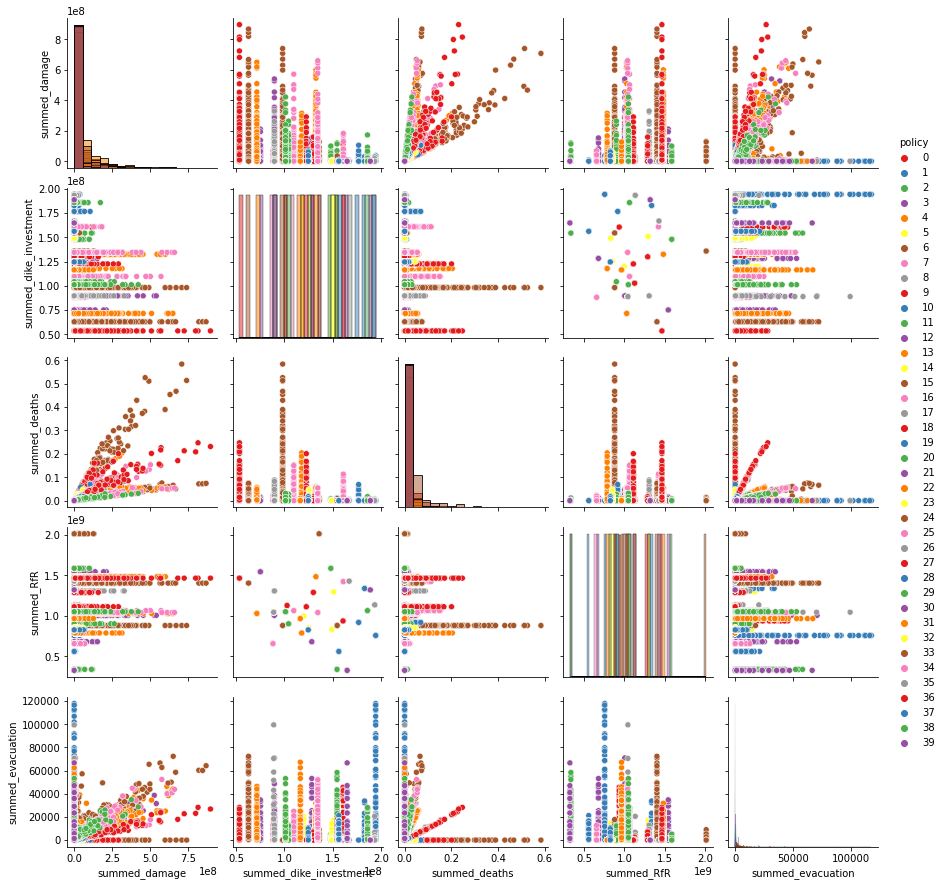

In [44]:
# Plot a pairplot of the outcomes of Deventer with the different colours indicating the different policies
sns.pairplot(summed_deventer, hue='policy', diag_kind='hist', palette='Set1')
plt.savefig('figures/Open Exploration/OpenExplorationDeventer.png')
plt.show()

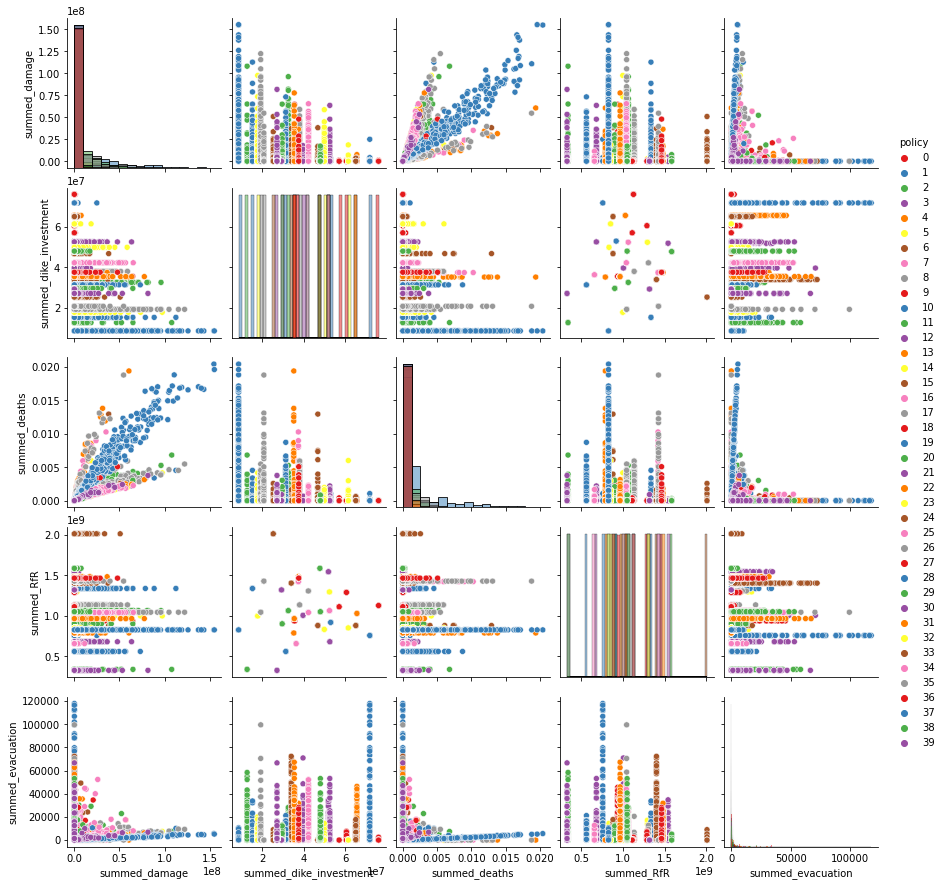

In [45]:
# Plot a pairplot of the outcomes of Gorrsel with the different colours indicating the different policies

sns.pairplot(summed_gorssel, hue='policy', diag_kind='hist', palette='Set1')
plt.savefig('figures/Open Exploration/OpenExplorationGorrsel.png')
plt.show()

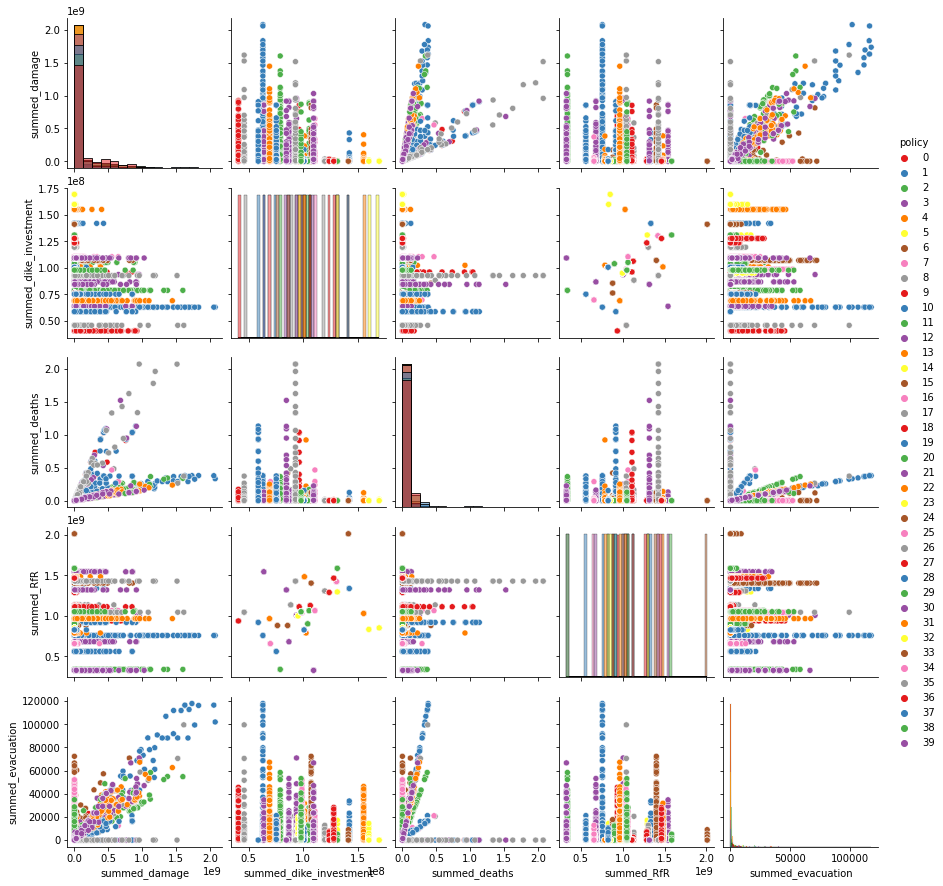

In [46]:
# Plot a pairplot of the outcomes of Zutphen with the different colours indicating the different policies

sns.pairplot(summed_zutphen, hue='policy', diag_kind='hist', palette='Set1')
plt.savefig('figures/Open Exploration/OpenExplorationZutphen.png')
plt.show()

In [ ]:
# Plot a pairplot of the outcomes of Cortenoever with the different colours indicating the different policies

sns.pairplot(summed_cortenoever, hue='policy', diag_kind='hist', palette='Set1')
plt.savefig('figures/Open Exploration/OpenExplorationCortenoever.png')
plt.show()

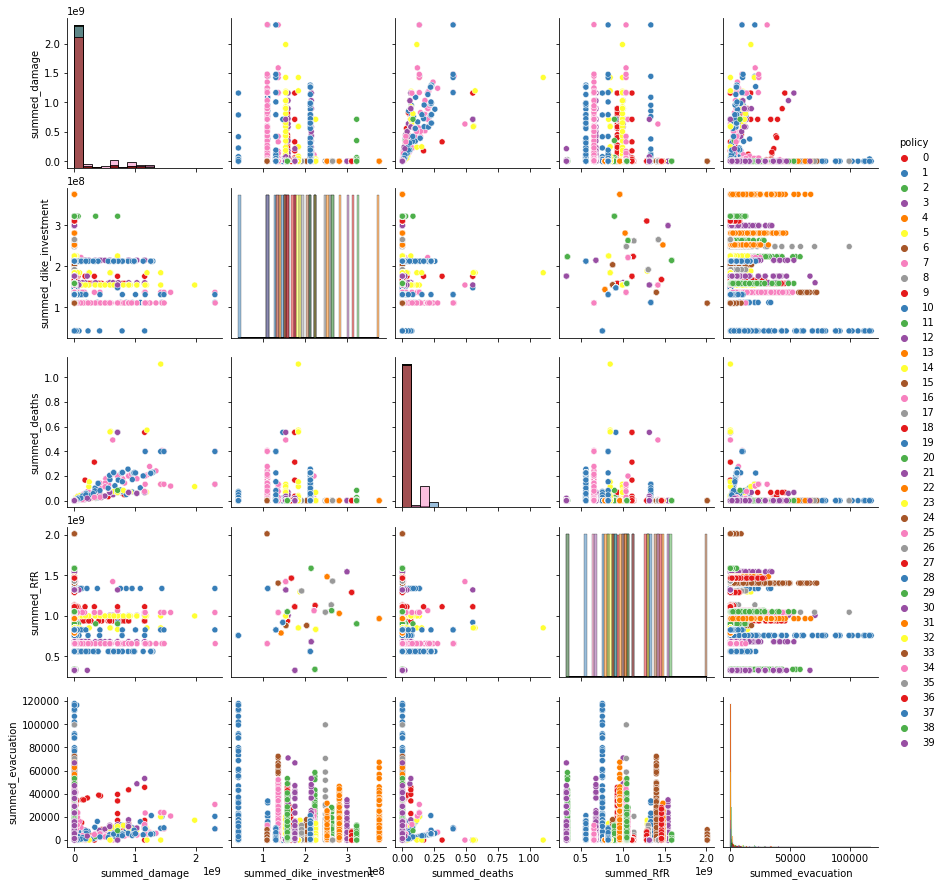

In [37]:
# Plot a pairplot of the outcomes of Doesburg with the different colours indicating the different policies

sns.pairplot(summed_doesburg, hue='policy', diag_kind='hist', palette='Set1')
plt.savefig('figures/Open Exploration/OpenExplorationDoesburg.png')
plt.show()

In [20]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations

def get_do_nothing_dict():
    return {l.name:0 for l in dike_model.levers}


policies = [Policy('policy 1', **dict(get_do_nothing_dict(), 
                                    **{'0_RfR 0':1,
                                      '0_RfR 1':1,
                                      '0_RfR 2':1,
                                      'A.1_DikeIncrease 0':5})),
           Policy('policy 2', **dict(get_do_nothing_dict(), 
                                   **{'4_RfR 0':1,
                                      '4_RfR 1':1,
                                      '4_RfR 2':1,
                                      'A.5_DikeIncrease 0':5})),
           Policy('policy 3', **dict(get_do_nothing_dict(),
                                   **{'1_RfR 0':1,
                                      '2_RfR 1':1,
                                      '3_RfR 2':1,
                                      'A.3_DikeIncrease 0':5}))]

In [21]:
#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [01:48<00:00,  2.78it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
